In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from IPython.display import Image, display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

## Question 7

In [2]:
boston = pd.read_csv('../../data/boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
X = boston.drop(['medv'], axis=1)
y = boston.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [4]:
from sklearn.ensemble import RandomForestRegressor

errors = np.zeros((20, 11))

for idx, n_features in enumerate(range(1, 13, 2)):
    tree_err = []
    
    for n_trees in range(25, 501, 25):
        regr = RandomForestRegressor(n_estimators=n_trees, criterion='squared_error', max_features=n_features,
                                    bootstrap=True, oob_score=True, random_state=1).fit(X_train, y_train)
        
        tree_err.append(np.mean((regr.predict(X_test) - y_test)**2))
    errors[:, idx] = tree_err

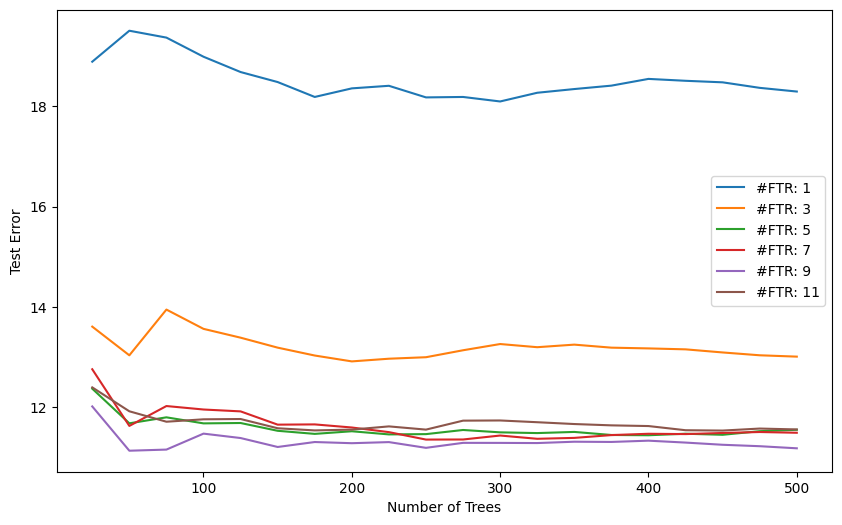

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for idx, n_features in enumerate(range(1, 13, 2)):
    ax.plot(np.arange(25, 501, 25), errors[:, idx], label=f'#FTR: {n_features}')
    
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Test Error')
ax.legend()

## Question 8

### 8.a

In [6]:
carseats = pd.read_csv('../../data/carseats.csv')
carseats = pd.get_dummies(carseats, columns=['ShelveLoc', 'Urban', 'US'])
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [7]:
X = carseats.drop(['Sales'], axis=1)
y = carseats.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### 8.b

In [8]:
from sklearn import tree

tree_reg = tree.DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                      min_samples_split=20, random_state=1)

tree_est = tree_reg.fit(X_train, y_train)

In [9]:
print('Training MSE: ', np.mean((tree_est.predict(X_train) - y_train)**2))

Training MSE:  1.8661296939226442


In [10]:
ftr_imp = pd.DataFrame(tree_est.feature_importances_, index=X.columns, columns=['Importances'])
ftr_imp = ftr_imp.sort_values(axis=0, ascending=False, by='Importances')
ftr_imp

,Importances
Price,0.336842
ShelveLoc_Good,0.302124
ShelveLoc_Bad,0.120917
Age,0.117835
CompPrice,0.074041
Advertising,0.026873
Education,0.011677
Income,0.009692
Population,0.000000
ShelveLoc_Medium,0.000000


In [ ]:
dot_data = tree.export_graphviz(tree_est, out_file='tree2.dot', feature_names=X.columns, 
                               filled=True, rounded=True, special_characters=True)

with open('tree2.dot') as f:
    dot_graph = f.read()
    
graph = graphviz.Source(dot_graph, format='png', engine='dot')
Image(graph.render())

### 8.c

In [12]:
print('Test MSE: ', np.mean((tree_est.predict(X_test) - y_test)**2))

Test MSE:  5.861453688554235


### 8.d

In [13]:
# Bagging

from sklearn.ensemble import BaggingRegressor

bagger = BaggingRegressor(n_estimators=500, max_features=X_train.shape[1],
                         bootstrap=True, oob_score=True, random_state=1)

bagger_est = bagger.fit(X_train, y_train)

In [14]:
# Score of the training dataset obtained using an out-of-bag estimate
bagger_est.oob_score_

0.6704212140235493

In [15]:
print('Training MSE: ', np.mean((bagger_est.predict(X_train) - y_train)**2))

Training MSE:  0.35974545601166513


In [16]:
print('Test MSE: ', np.mean((bagger_est.predict(X_test) - y_test)**2))

Test MSE:  2.9134626570700064


### 8.e

In [17]:
regr = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_features=n_features,
                                    bootstrap=True, oob_score=True, random_state=1)

regr_est = regr.fit(X_train, y_train)

In [18]:
# Score of the training dataset obtained using an out-of-bag estimate
regr_est.oob_score_

0.6689866968029845

In [19]:
print('Training MSE: ', np.mean((regr_est.predict(X_train) - y_train)**2))

Training MSE:  0.3607265066449981


In [20]:
print('Test MSE: ', np.mean((regr_est.predict(X_test) - y_test)**2))

Test MSE:  2.9535801218225033


In [21]:
ftr_imp = pd.DataFrame(regr_est.feature_importances_, index=X.columns, columns=['Importances'])
ftr_imp = ftr_imp.sort_values(axis=0, ascending=False, by='Importances')
ftr_imp

,Importances
Price,0.280917
ShelveLoc_Good,0.157841
ShelveLoc_Bad,0.134636
Age,0.093829
CompPrice,0.083848
Advertising,0.062695
Income,0.049990
Population,0.045152
ShelveLoc_Medium,0.044204
Education,0.029805


## Question 9

In [22]:
oj = pd.read_csv('../../data/oj.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [23]:
oj.Purchase.value_counts()

CH    653
MM    417
Name: Purchase, dtype: int64

In [24]:
oj = pd.get_dummies(oj, columns=['Purchase', 'Store7', ])
oj.drop(['Purchase_MM', 'Store7_No'], axis=1, inplace=True)

### 9.a

In [25]:
X = oj.drop(['Purchase_CH'], axis=1)
y = oj.Purchase_CH

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=1)

### 9.b

In [26]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=1, min_samples_split=20)
clf_est = clf.fit(X_train, y_train)

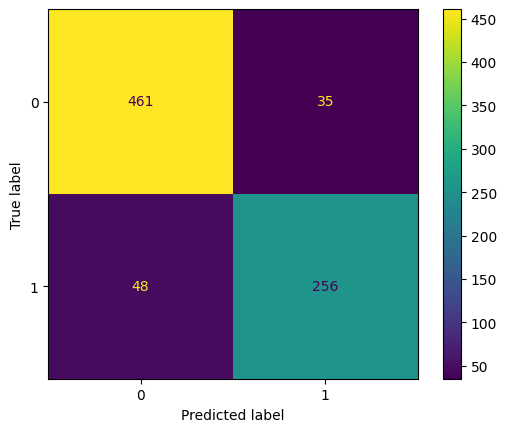

In [27]:
conf_mat = confusion_matrix(y_train, clf_est.predict(X_train), labels=[True, False])
disp = ConfusionMatrixDisplay(conf_mat, display_labels=clf_est.classes_)
disp.plot()

In [28]:
print('Training Error Rate: ', (conf_mat[0, 1] + conf_mat[1, 0])/conf_mat.sum())

Training Error Rate:  0.10375


In [29]:
print('Number of terminal nodes: ', clf_est.get_n_leaves())

Number of terminal nodes:  58


### 9.d

In [ ]:
dot_data = tree.export_graphviz(clf_est, out_file='tree3.dot', feature_names=X.columns, 
                               filled=True, rounded=True, special_characters=True)

with open('tree3.dot') as f:
    dot_graph = f.read()
    
graph = graphviz.Source(dot_graph, format='png', engine='dot')
Image(graph.render())

### 9.e

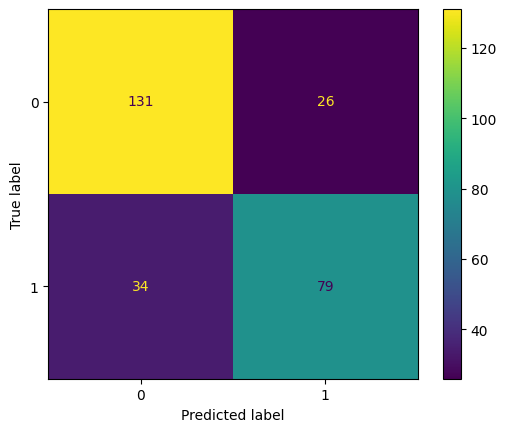

In [31]:
conf_mat = confusion_matrix(y_test, clf_est.predict(X_test), labels=[True, False])
disp = ConfusionMatrixDisplay(conf_mat, display_labels=clf_est.classes_)
disp.plot()

In [32]:
print('Test Error Rate: ', (conf_mat[0, 1] + conf_mat[1, 0])/conf_mat.sum())

Test Error Rate:  0.2222222222222222


In [33]:
# CH    653
# MM    417
# The baseline model performance, the model always predicts CH
print('The baseline model error: ', 1-(653/1070))

The baseline model error:  0.3897196261682243


### 9.f-g-h

In scikit-learn, there is no direct way to control the size of a classification tree. However, we can achieve a similar effect by controlling the `min_samples_leaf` parameter. By setting `min_samples_leaf` to a higher value, we can enforce a minimum number of samples required to be in each leaf of the tree. This indirectly controls the size of the tree by preventing further splitting when the number of samples in a leaf falls below the specified threshold. By increasing `min_samples_leaf`, we can effectively limit the size of the resulting tree.

Text(0, 0.5, 'CV Error')

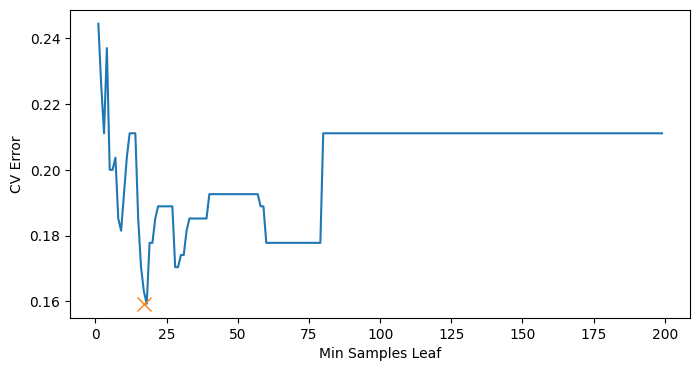

In [34]:
cv_errors = []

for samples in range(1, 200):
    
    clf_ = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                      min_samples_leaf=samples, random_state=1)
    
    clf_est_ = clf_.fit(X_train, y_train)
    
    cv_errors.append(np.mean((clf_est_.predict(X_test) - y_test)**2))
    
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(np.arange(1, 200), cv_errors)
ax.plot(np.argmin(cv_errors), np.min(cv_errors), marker='x', markersize=10)
ax.set_xlabel('Min Samples Leaf')
ax.set_ylabel('CV Error')

### 9.i

In [35]:
np.argmin(cv_errors), np.min(cv_errors)

(17, 0.15925925925925927)

In [36]:
clf2 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                      min_samples_leaf=17, random_state=1)
clf_est2 = clf2.fit(X_train, y_train)

In [37]:
print('Number of terminal nodes: ', clf_est2.get_n_leaves())

Number of terminal nodes:  30


While the previous model has `58 terminal nodes`, the current model has `30 terminal nodes`. So the cross-validation leads to a selection of a pruned tree.

### 9.j

In [38]:
# Main Model Confusion Matrix
conf_mat = confusion_matrix(y_train, clf_est.predict(X_train), labels=[True, False])
conf_mat

array([[461,  35],
       [ 48, 256]])

In [39]:
print('Main model training error: ', (conf_mat[0, 1] + conf_mat[1, 0])/ conf_mat.sum())

Main model training error:  0.10375


In [40]:
# Main Model Confusion Matrix
conf_mat2 = confusion_matrix(y_train, clf_est2.predict(X_train), labels=[True, False])
conf_mat2

array([[433,  63],
       [ 54, 250]])

In [41]:
print('Model selected with CV - training error: ', (conf_mat2[0, 1] + conf_mat2[1, 0])/ conf_mat2.sum())

Model selected with CV - training error:  0.14625


The training error for the pruned classification tree is higher compared to the unpruned tree. This is because pruning reduces the flexibility of the tree by removing certain branches and nodes. The pruning process aims to prevent overfitting by simplifying the tree and reducing its complexity. However, this simplification can result in a loss of predictive power, leading to a higher training error.

### 9.k

In [42]:
conf_mat3 = confusion_matrix(y_test, clf_est.predict(X_test), labels=[True, False])
conf_mat3

array([[131,  26],
       [ 34,  79]])

In [43]:
conf_mat4 = confusion_matrix(y_test, clf_est2.predict(X_test), labels=[True, False])
conf_mat4

array([[137,  20],
       [ 24,  89]])

In [44]:
print('Main model test error: ', (conf_mat3[0, 1] + conf_mat3[1, 0])/ conf_mat3.sum())

Main model test error:  0.2222222222222222


In [45]:
print('Model selected with CV - test error: ', (conf_mat4[0, 1] + conf_mat4[1, 0])/ conf_mat4.sum())

Model selected with CV - test error:  0.16296296296296298


The unpruned tree has a higher test error compared to the pruned tree. The pruning implementation improves the performance of the tree on the test set by reducing overfitting. While the unpruned tree may have a lower training error, it tends to generalize poorly to new, unseen data. In contrast, the pruned tree achieves a better balance between bias and variance, resulting in lower test error and improved generalization performance.

## Question 10

### 10.a-b

In [46]:
hitters = pd.read_csv('../../data/hitters.csv')
hitters = pd.get_dummies(hitters, ['League', 'Division', 'NewLeague'])
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,NaN,1,0,1,0,1,0
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1


In [47]:
hitters.isna().any()

AtBat          False
Hits           False
HmRun          False
Runs           False
RBI            False
Walks          False
Years          False
CAtBat         False
CHits          False
CHmRun         False
CRuns          False
CRBI           False
CWalks         False
PutOuts        False
Assists        False
Errors         False
Salary          True
League_A       False
League_N       False
Division_E     False
Division_W     False
NewLeague_A    False
NewLeague_N    False
dtype: bool

In [48]:
hitters.dropna(axis=0, inplace=True)
hitters.isna().any()

AtBat          False
Hits           False
HmRun          False
Runs           False
RBI            False
Walks          False
Years          False
CAtBat         False
CHits          False
CHmRun         False
CRuns          False
CRBI           False
CWalks         False
PutOuts        False
Assists        False
Errors         False
Salary         False
League_A       False
League_N       False
Division_E     False
Division_W     False
NewLeague_A    False
NewLeague_N    False
dtype: bool

In [49]:
X = hitters.drop(['Salary'], axis=1)
y = np.log(hitters.Salary)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=200, random_state=1)

### 10.c

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rates = np.linspace(.001,.1, 20)
train_errs = []
test_errs = []

for rate in learning_rates:
    boosting_est = GradientBoostingRegressor(loss='squared_error', learning_rate=rate, n_estimators=1000,
                                        max_depth=1, random_state=1).fit(X_train, y_train)
    
    train_errs.append(np.mean((boosting_est.predict(X_train) - y_train)**2))
    test_errs.append(np.mean((boosting_est.predict(X_test) - y_test)**2))

Text(0, 0.5, 'Training Errors')

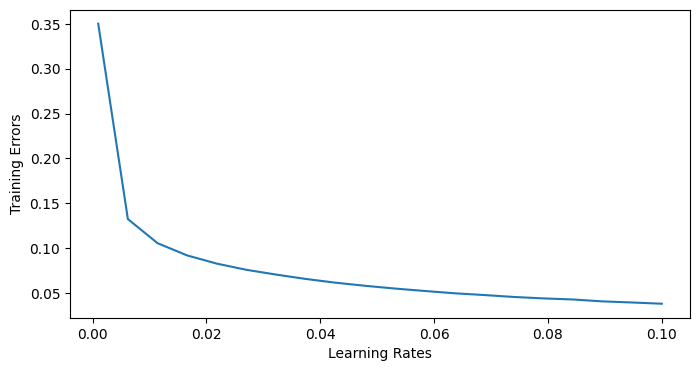

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(learning_rates, train_errs)
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Training Errors')

### 10.d

Text(0, 0.5, 'Test Errors')

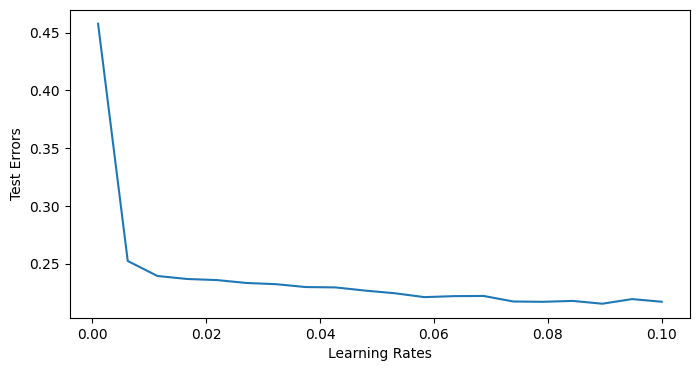

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(learning_rates, test_errs)
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Test Errors')

In [53]:
# The best test error
np.argmin(test_errs), np.min(test_errs)

(17, 0.21524013367505257)

### 10.e

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr_est = lr.fit(X_train, y_train)

print('Multiple Linaer Regression Test Error: ', np.mean((y_test - lr.predict(X_test))**2))

Multiple Linaer Regression Test Error:  0.45263888847266043


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [56]:
from sklearn.linear_model import LassoCV, Lasso

alphas = 10**np.linspace(-3, 1, 100)
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000).fit(X_, y)

In [57]:
print('The optimal value of alpha: ', lassocv.alpha_)

The optimal value of alpha:  0.01788649529057435


In [58]:
lasso = Lasso(alpha=lassocv.alpha_, max_iter=10000)
lasso.fit(X_train, y_train)

print('The Lasso Test Error: ', np.mean((y_test - lasso.predict(X_test))**2))

The Lasso Test Error:  0.46764932393541075


Based on the test error results, the boosting tree method demonstrates better performance compared to the multiple linear regression and lasso methods. The boosting tree method is able to effectively handle complex relationships and interactions among variables, which can result in improved predictive accuracy. It is important to note that the relative performance of these methods may vary depending on the specific dataset and problem at hand.

### 10.f

In [59]:
boosting_est = GradientBoostingRegressor(loss='squared_error', learning_rate=learning_rates[np.argmin(test_errs)],
                                        n_estimators=1000, max_depth=1, random_state=1).fit(X_train, y_train)

ftr_imp = pd.DataFrame(boosting_est.feature_importances_, index=X.columns, columns=['Importances'])
ftr_imp = ftr_imp.sort_values(axis=0, ascending=False, by='Importances')
ftr_imp

,Importances
CAtBat,0.342016
CHits,0.154742
CHmRun,0.097500
Years,0.071202
Hits,0.066466
CRuns,0.063560
CWalks,0.063143
RBI,0.031201
Walks,0.022251
PutOuts,0.021109


### 10.g

In [60]:
bagger = BaggingRegressor(n_estimators=500, max_features=X_train.shape[1],
                         bootstrap=True, oob_score=True, random_state=1)

bagger_est = bagger.fit(X_train, y_train)

In [61]:
print('Bagging method Test Error: ', np.mean((y_test - bagger_est.predict(X_test))**2))

Bagging method Test Error:  0.24736640022010836


## Question 11

### 11.a

In [62]:
caravan = pd.read_csv('../../data/caravan.csv')
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [63]:
X = caravan.drop(['Purchase'], axis=1)
y = caravan.Purchase
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1000, random_state=1)

### 11.b

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, max_depth=4,
                                      random_state=1).fit(X_train, y_train)

boosting_est = boosting.fit(X_train, y_train)

In [65]:
ftr_imp = pd.DataFrame(boosting_est.feature_importances_, index=X.columns, columns=['Importances'])
ftr_imp = ftr_imp.sort_values(axis=0, ascending=False, by='Importances')
ftr_imp.head(10)

,Importances
PPERSAUT,0.050386
MBERMIDD,0.043298
AFIETS,0.043082
MGODOV,0.039407
MINK3045,0.036786
MGODPR,0.031660
MSKC,0.031638
APLEZIER,0.030369
MFGEKIND,0.029569
MBERARBG,0.027990


### 11.c

In [66]:
y_pred = boosting_est.predict_proba(X_test)
y_pred = ['No' if row[1] < 0.2 else 'Yes' for row in y_pred]

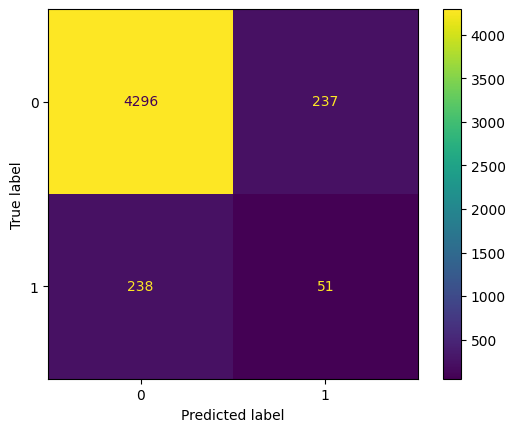

In [67]:
conf_mat = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [68]:
print('Fraction of the people predicted to make a purchase do in fact make one: ', conf_mat[1,1]/(conf_mat[0,1] + conf_mat[1,1]))

Fraction of the people predicted to make a purchase do in fact make one:  0.17708333333333334


Out of the predicted purchases, approximately 17% of them actually result in a purchase.

In [69]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)

logit = LogisticRegression(fit_intercept=True,)
logit_est = logit.fit(X_train_, y_train)

In [70]:
y_pred2 = logit_est.predict_proba(scaler.transform(X_test))
y_pred2 = ['No' if row[1] < 0.2 else 'Yes' for row in y_pred2]

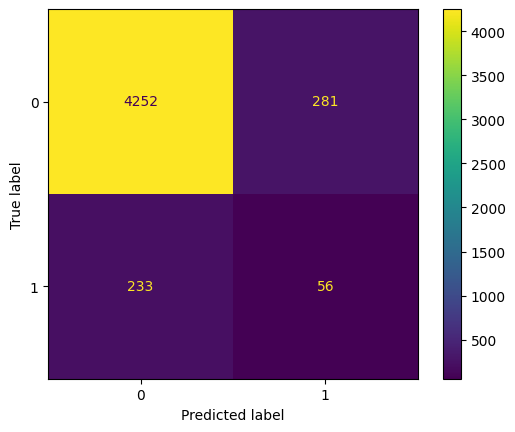

In [71]:
conf_mat = confusion_matrix(y_test, y_pred2, labels=['No', 'Yes'])
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [72]:
print('Fraction of the people predicted to make a purchase do in fact make one: ', conf_mat[1,1]/(conf_mat[0, 1] + conf_mat[1,1]))

Fraction of the people predicted to make a purchase do in fact make one:  0.1661721068249258


The boosting tree model captures a slightly higher percentage of people who make a purchase, approximately 17%.

In [73]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_est = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred3 = knn_est.predict_proba(X_test)
y_pred3 = ['No' if row[1] < 0.2 else 'Yes' for row in y_pred3]

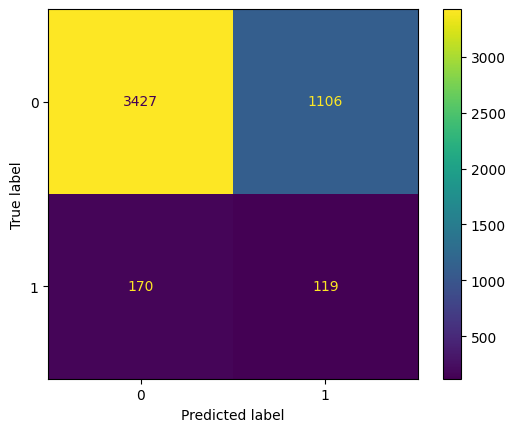

In [74]:
conf_mat = confusion_matrix(y_test, y_pred3, labels=['No', 'Yes'])
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [75]:
print('Fraction of the people predicted to make a purchase do in fact make one: ', conf_mat[1,1]/(conf_mat[0,1] + conf_mat[1,1]))

Fraction of the people predicted to make a purchase do in fact make one:  0.09714285714285714


The boosting tree model outperforms the KNN classifier method by approximately twice as much.